# Numerische Optimierungsverfahren

In diesem Notebook sind zwei numerische Optimierungsverfahren zum Lösen von Minimierungsproblemen implementiert: 
das Bergsteigerverfahren und das Gradientenabstiegsverfahren.

In [1]:
# Pakete laden
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Das Bergsteigerverfahren

In [9]:
def f(x):
    return math.cos(x) + 3 * math.sin(0.6 * x - 2) + 3 * math.cos(2 * x - 2)

def optimize_function(x0, delta, max_iter):
    # Initialisiere den aktuellen x-Wert mit dem Startwert x0
    current_x = x0

    # Berechne den Funktionswert f(x0)
    current_f = f(current_x)

    # Iterationszähler
    iteration = 0

    # Schleife für die Optimierung
    while iteration < max_iter:
        # Berechne den Funktionswert f(x0 - delta)
        left_f = f(current_x - delta)

        # Berechne den Funktionswert f(x0 + delta)
        right_f = f(current_x + delta)

        # Überprüfe, ob f(x0 - delta) kleiner ist als der aktuelle Funktionswert
        if left_f < current_f:
            # Wähle x0 - delta als neuen x-Wert
            current_x = current_x - delta
            current_f = left_f
        # Überprüfe, ob f(x0 + delta) kleiner ist als der aktuelle Funktionswert
        elif right_f < current_f:
            # Wähle x0 + delta als neuen x-Wert
            current_x = current_x + delta
            current_f = right_f
        else:
            # Wenn weder links noch rechts eine Verbesserung bringt, breche die Schleife ab
            break

        # Inkrementiere den Iterationszähler
        iteration += 1

    # Gib das gefundene Minimum und den entsprechenden Funktionswert aus
    return current_x, current_f

# Test des Algorithmus
start_x = 0.0  # Startwert
step_size = 0.1  # Schrittweite
max_iterations = 100  # Maximale Anzahl Iterationen

min_x, min_f = optimize_function(start_x, step_size, max_iterations)
print("Minimum bei x =", min_x)
print("Wert der Zielfunktion an diesem Minimum =", min_f)


Minimum bei x = -0.5
Wert der Zielfunktion an diesem Minimum = -4.329510564441125


In [10]:
# Definiere die Funktion f(x)
def f(x):
    return np.cos(x) + 3 * np.sin(0.6 * x - 2) + 3 * np.cos(2 * x - 2)

# Bergsteigerverfahren
def local_minimum_search(start_x, stepsize, num_steps):
    
    # Aktueller x-Wert jedes Iterationsschrittes
    current_x = start_x

    # Liste zum Speichern aller Iterationspunkte (für grafische Darstellung)
    x_values = [current_x]
    y_values = [f(current_x)]

    for i in range(num_steps):
        current_value = f(current_x)
        left_value = f(current_x - stepsize)
        right_value = f(current_x + stepsize)

        # Falls Funktionswert links kleiner als aktueller Funktionswert, gehe nach links
        if left_value < current_value:
            current_x = current_x - stepsize
            
        # Falls Funktionswert rechts kleiner als aktueller Funktionswert, gehe nach rechts
        elif right_value < current_value:
            current_x = current_x + stepsize
        else:
            break 

        x_values.append(current_x)
        y_values.append(f(current_x))

    return current_x, f(current_x), x_values, y_values

### Anwendung des Bergsteigerverfahrens

In [11]:
# Startwert
start_x = 0.4

# Schrittweite
stepsize = 0.1

# Maximale Anzahl Iterationen
num_steps = 1000

# Lokalen Minimalpunkt suchen
min_x, min_y, x_iterations, y_iterations = local_minimum_search(start_x, stepsize, num_steps)
print('Lokaler Minimalpunkt bei x =', min_x, 'und y =', np.round(min_y, 2))

Lokaler Minimalpunkt bei x = -0.5 und y = -4.33


### Grafische Darstellung der Iterationsschritte

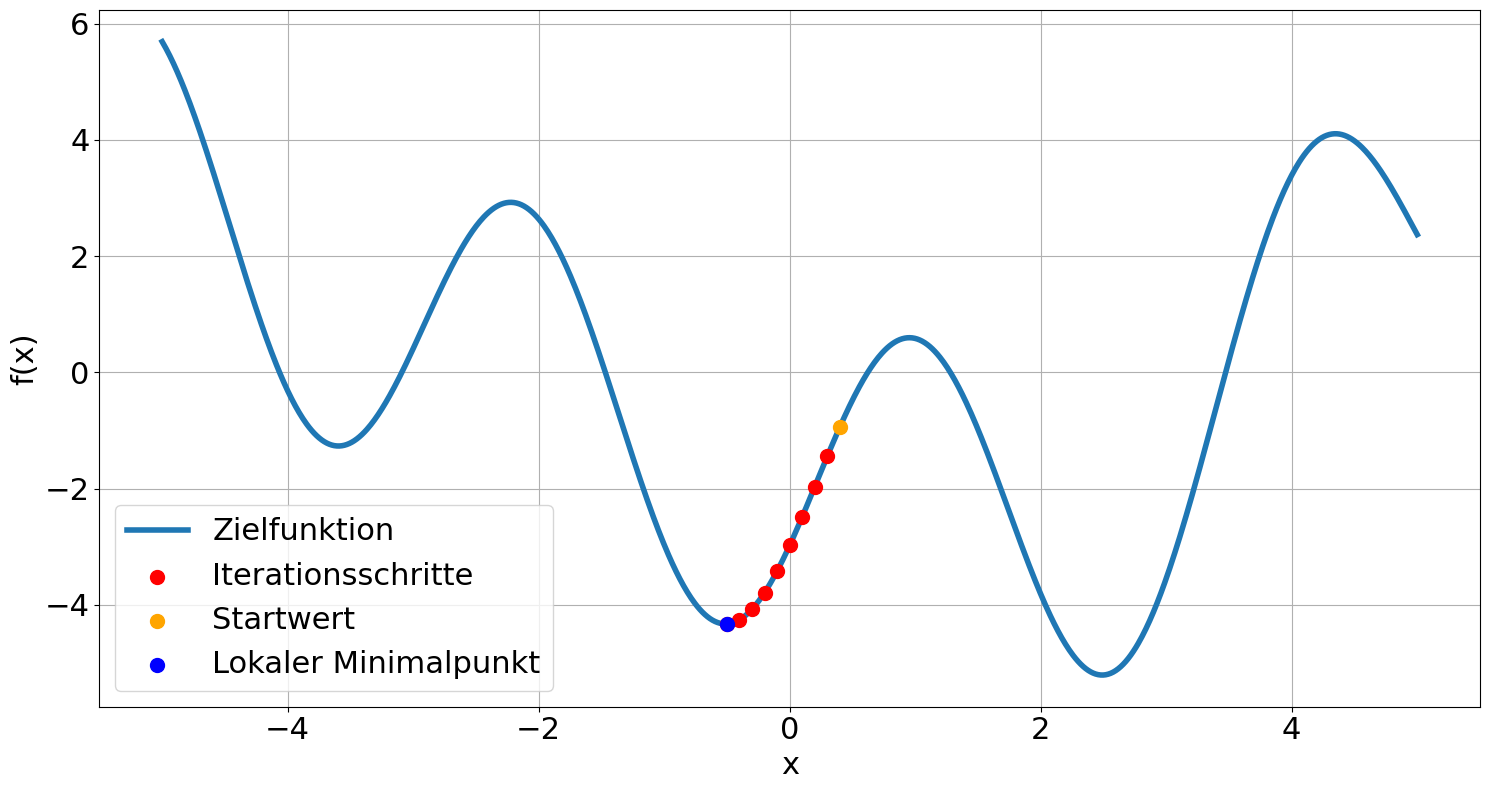

In [23]:
# Plot der Zielfunktion und Verlauf des Bergsteigerverfahrens
x_range = np.linspace(-5, 5, 1000)
y_range = [f(x) for x in x_range]

plt.figure(figsize=(15, 8))
plt.plot(x_range, y_range, label = 'Zielfunktion', linewidth = 4)
plt.scatter(x_iterations[1:], y_iterations[1:], marker='o', color='red',  s = 100, label='Iterationsschritte',  zorder=3)
plt.scatter(start_x, f(start_x), color='orange', marker='o', s = 100, label='Startwert', zorder=3)
plt.scatter(min_x, min_y, color='blue', marker='o', s = 100, label='Lokaler Minimalpunkt', zorder=3)
plt.xlabel('x', fontsize = 22)  
plt.ylabel('f(x)', fontsize = 22)   

# Skalenwerte auf Achsen vergrößern
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22)

# Das Grid in den Hintergrund setzen
plt.grid(True)
plt.gca().set_axisbelow(True)


plt.savefig('bergsteigerverfahren.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

# Das Gradientenabstiegsverfahren

Zunächst wenden wir das Gradientenabstiegsverfahren auf eine eindimensionale Funktion an. 

In [6]:
def f_eindim(x):
    return math.cos(x) + 3 * math.sin(0.6 * x - 2) + 3 * math.cos(2 * x - 2)

# Wähle einen Startpunkt für den Algorithmus
start_x = 1.5

# Liste zum Speichern der Iterationspunkte
iterations = []

# Callback-Funktion, um Iterationspunkte zu speichern
def callback(xk):
    iterations.append(xk[0])  # Speichere den Wert von xk als einzelnes Element

# Wende das Gradientenabstiegsverfahren an
result = minimize(f_eindim, start_x, method='BFGS', callback=callback)

# Füge den Startpunkt zur Liste der Iterationen hinzu
iterations.insert(0, start_x)
iterations = np.array(iterations)

# Gib das Ergebnis aus
print("Optimales x:", result.x)
print("Minimalwert von f(x):", result.fun)

Optimales x: [2.48979889]
Minimalwert von f(x): -5.210083199506812


Die Iterationsschritte und den Funktionsgraphen werden im Folgenden grafisch dargestellt.

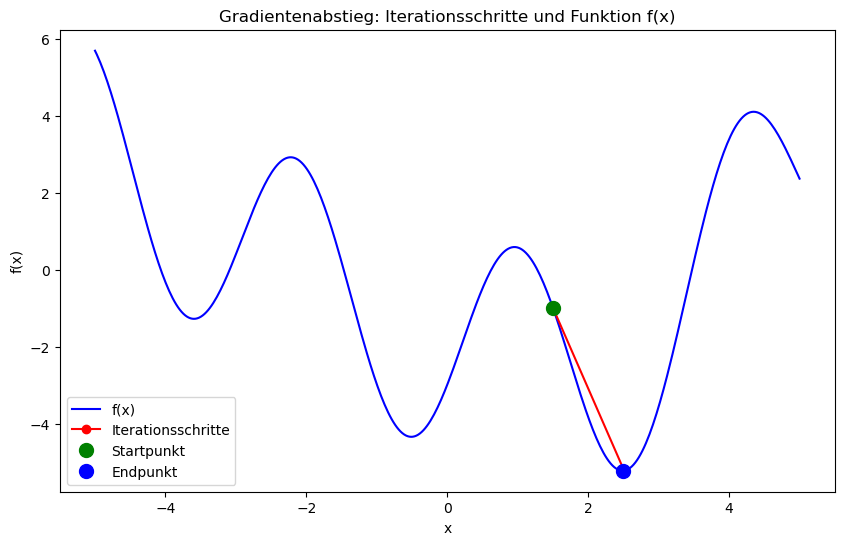

In [7]:
# Erzeuge die Werte für den Plot
x = np.linspace(-5, 5, 400)
y = np.array([f_eindim(xi) for xi in x])

# Plot der Funktion
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)', color='blue')

# Plot der Iterationsschritte
plt.plot(iterations, [f_eindim(xi) for xi in iterations], 'ro-', label='Iterationsschritte')

# Markiere den Startpunkt und den Endpunkt
plt.plot(start_x, f_eindim(start_x), 'go', markersize=10, label='Startpunkt')
plt.plot(result.x, f_eindim(result.x), 'bo', markersize=10, label='Endpunkt')

# Achsenbeschriftungen und Titel
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Gradientenabstieg: Iterationsschritte und Funktion f(x)')

plt.show()


In [12]:
def f_zweidim(x):
    return (x[0] - 2)**2 + (x[1] - 5)**2

# Wähle einen Startpunkt für den Algorithmus
start_values = np.array([0.0, 0.0])

# Liste zum Speichern der Iterationspunkte, um diese zu plotten
iterations = []

# Callback-Funktion, um Iterationspunkte zu speichern
def callback(xk):
    iterations.append(np.copy(xk))

# Wende das Gradientenabstiegsverfahren an
result = minimize(f_zweidim, start_values, method='BFGS', callback=callback)


# Füge den Startpunkt zur Liste der Iterationen hinzu
iterations.insert(0, start_values)
iterations = np.array(iterations)

# Gib das Ergebnis aus
print("Optimales x:", result.x)
print("Minimalwert von f(x):", result.fun)

Optimales x: [1.99999963 5.00000005]
Minimalwert von f(x): 1.367868682191627e-13


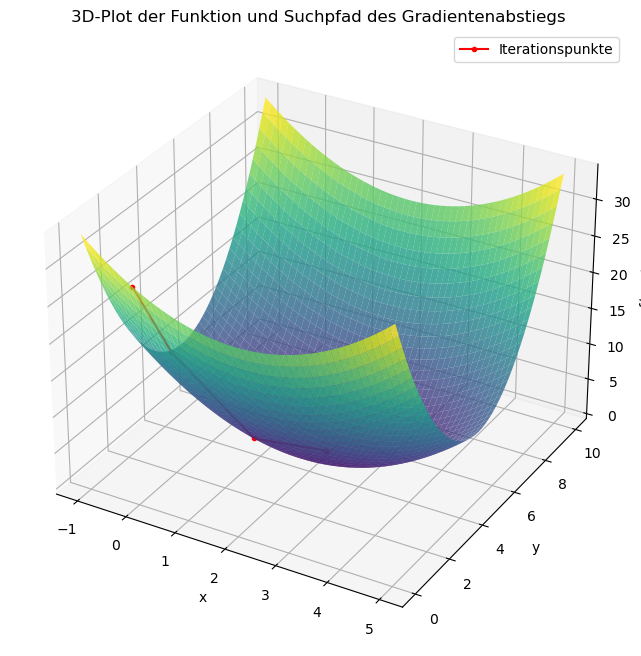

In [13]:
# Iterationsschritte Plotten
x = np.linspace(-1, 5, 400)
y = np.linspace(0, 10, 400)
X, Y = np.meshgrid(x, y)
Z = f_zweidim([X, Y])

# Plot der Funktion
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Iterationspunkte
ax.plot(iterations[:, 0], iterations[:, 1], f_zweidim(iterations.T), 'r.-', label='Iterationspunkte')

# Achsenbeschriftungen
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.legend()
plt.title("3D-Plot der Funktion und Suchpfad des Gradientenabstiegs")
plt.show()
